In [0]:
import os #ADD FIELD FOR RETURNED PRODUCTS LATER
os.chdir("drive/My Drive/CustomerSegmentation")

In [4]:
! unzip *.zip

Archive:  download.zip
  inflating: data.csv                


In [6]:
import pandas as pd
import numpy as np

customer_data = pd.read_csv("data.csv", encoding="latin1")
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [0]:
customer_data["InvoiceDate"] = pd.to_datetime(customer_data["InvoiceDate"])

In [8]:
customer_data.isnull().sum(axis = 0)


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [37]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [0]:
customer_data.dropna(subset=["CustomerID"], inplace= True)

In [0]:
customer_data["Total"] = customer_data["UnitPrice"].multiply(customer_data["Quantity"])


In [0]:
customer_data["Cancelled"] = customer_data["InvoiceNo"].apply(lambda x : int('C' in x))

In [78]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total,Cancelled
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,0


In [81]:
temp = customer_data.groupby(["CustomerID"], as_index= False)[["InvoiceDate"]].count()
temp.rename(columns = {"InvoiceDate":"TransCount"}, inplace = True)
temp.head()

,CustomerID,TransCount
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [82]:
temp2 = customer_data.groupby(["CustomerID"], as_index= False)[["Total", "Cancelled"]].sum()
temp2.head()

,CustomerID,Total,Cancelled
0,12346.0,0.00,1
1,12347.0,4310.00,0
2,12348.0,1797.24,0
3,12349.0,1757.55,0
4,12350.0,334.40,0


In [28]:
len(temp) - len(temp2)

0

In [83]:
main_df = pd.merge(temp, temp2, on = ["CustomerID"])
main_df.head()


,CustomerID,TransCount,Total,Cancelled
0,12346.0,2,0.00,1
1,12347.0,182,4310.00,0
2,12348.0,31,1797.24,0
3,12349.0,73,1757.55,0
4,12350.0,17,334.40,0


In [84]:
main_df = pd.merge(main_df,customer_data[["CustomerID","Country"]], on ="CustomerID").drop_duplicates().reset_index()
main_df.head()

,index,CustomerID,TransCount,Total,Cancelled,Country
0,0,12346.0,2,0.00,1,United Kingdom
1,2,12347.0,182,4310.00,0,Iceland
2,184,12348.0,31,1797.24,0,Finland
3,215,12349.0,73,1757.55,0,Italy
4,288,12350.0,17,334.40,0,Norway


In [85]:
main_df["CustomerID"] = main_df["CustomerID"].astype(int).astype(str)
main_df.head()

,index,CustomerID,TransCount,Total,Cancelled,Country
0,0,12346,2,0.00,1,United Kingdom
1,2,12347,182,4310.00,0,Iceland
2,184,12348,31,1797.24,0,Finland
3,215,12349,73,1757.55,0,Italy
4,288,12350,17,334.40,0,Norway


In [0]:
main_df.drop(columns = "index", inplace = True)

In [88]:
main_df["TransCount"] = main_df["TransCount"].subtract(main_df["Cancelled"])
main_df.head()

,CustomerID,TransCount,Total,Cancelled,Country
0,12346,1,0.00,1,United Kingdom
1,12347,182,4310.00,0,Iceland
2,12348,31,1797.24,0,Finland
3,12349,73,1757.55,0,Italy
4,12350,17,334.40,0,Norway


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Customer Expenditures')

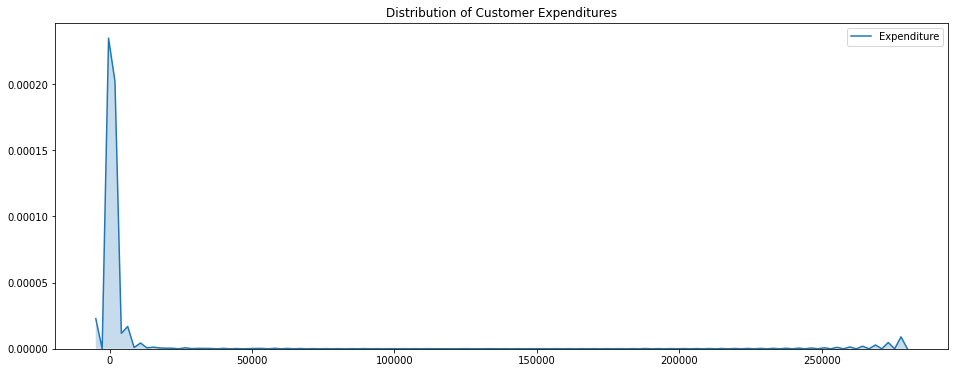

In [92]:
plt.figure(figsize = (16,6))
sns.kdeplot(data = main_df["Total"],shade=True, label = "Expenditure")
plt.title("Distribution of Customer Expenditures")

Text(0.5, 1.0, 'Distribution of transactions per customer')

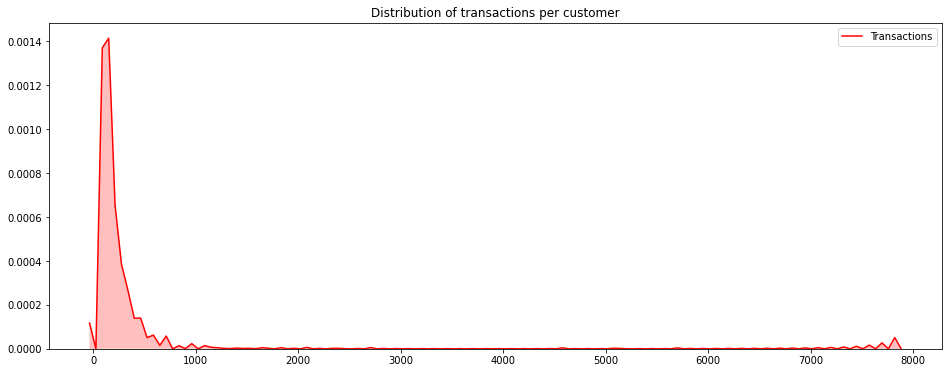

In [95]:
plt.figure(figsize = (16,6))
sns.kdeplot(data = main_df["TransCount"],shade=True, label = "Transactions", color = "red")

plt.title("Distribution of transactions per customer")

Text(0.5, 1.0, 'Distribution of cancellations per customer')

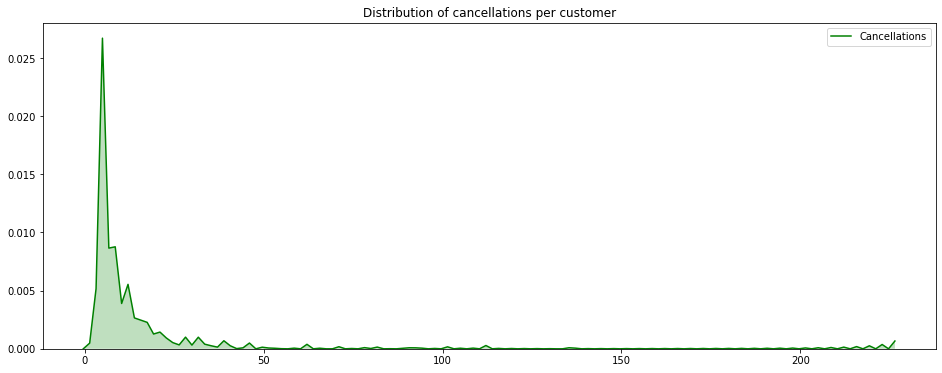

In [97]:
plt.figure(figsize = (16,6))

sns.kdeplot(data = main_df["Cancelled"],shade=True, label = "Cancellations", color = "green")
plt.title("Distribution of cancellations per customer")

Text(0.5, 1.0, 'Countrywise distribution')

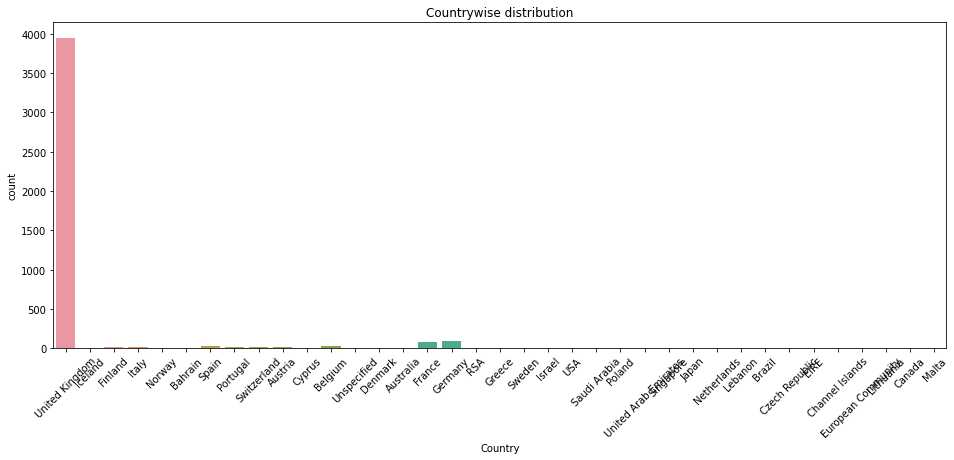

In [98]:
plt.figure(figsize = (16,6))
chart = sns.countplot(x = "Country", data = main_df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title("Countrywise distribution")

Text(0.5, 1.0, 'plot of transactions and total')

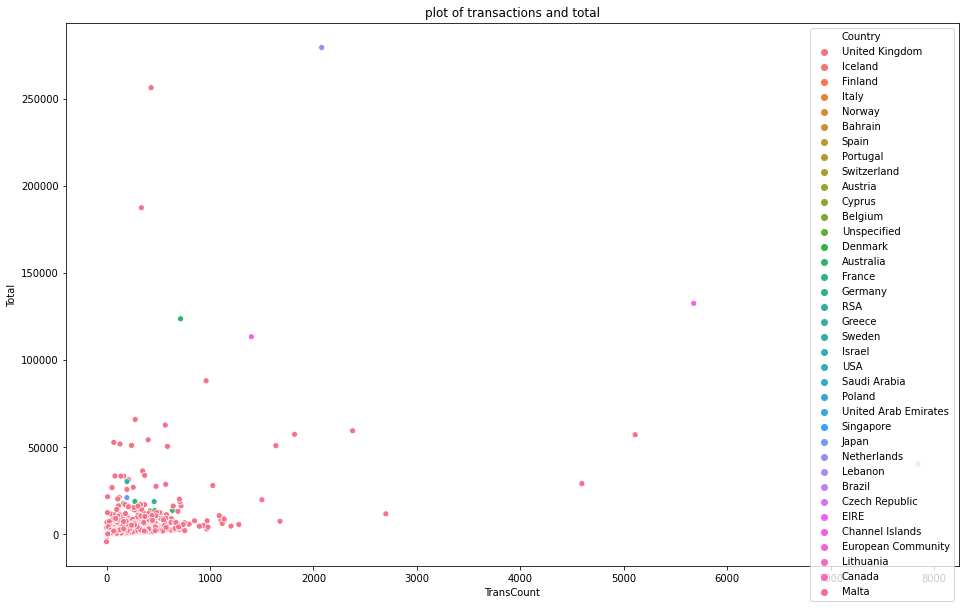

In [101]:
plt.figure(figsize = (16,10))
sns.scatterplot(x = "TransCount", y = "Total", hue = "Country", data = main_df)
plt.title("plot of transactions and total")

In [103]:
main_df["IsUK"] = main_df["Country"].apply(lambda x : int(x == "United Kingdom"))
main_df.head()

,CustomerID,TransCount,Total,Cancelled,Country,IsUK
0,12346,1,0.00,1,United Kingdom,1
1,12347,182,4310.00,0,Iceland,0
2,12348,31,1797.24,0,Finland,0
3,12349,73,1757.55,0,Italy,0
4,12350,17,334.40,0,Norway,0


In [104]:
main_df.drop(columns = "Country", inplace = True)
main_df.head()

,CustomerID,TransCount,Total,Cancelled,IsUK
0,12346,1,0.00,1,1
1,12347,182,4310.00,0,0
2,12348,31,1797.24,0,0
3,12349,73,1757.55,0,0
4,12350,17,334.40,0,0


In [0]:
from sklearn.preprocessing import StandardScaler

main_arr = main_df[["TransCount","Total", "Cancelled", "IsUK"]].values
main_arr = StandardScaler().fit_transform(main_arr)


In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for n_clusters in range(2,12):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(main_arr)
    clusters = kmeans.predict(main_arr)
    silhouette_avg = silhouette_score(main_arr, clusters)
    print(f"For {n_clusters} clusters score is {silhouette_avg}")

For 2 clusters score is 0.9429431959460708
For 3 clusters score is 0.7873451296660631
For 4 clusters score is 0.7873065965703968
For 5 clusters score is 0.807042900941022
For 6 clusters score is 0.7845709000324145
For 7 clusters score is 0.7206638926418127
For 8 clusters score is 0.7212259748500129
For 9 clusters score is 0.6990540985477829
For 10 clusters score is 0.6147914783322582
For 11 clusters score is 0.7124109354701545


In [115]:
kmeans = KMeans(init='k-means++', n_clusters = 5, n_init=30)
kmeans.fit(main_arr)
clusters = kmeans.predict(main_arr)
silhouette_avg = silhouette_score(main_arr, clusters)
print(f"For {5} clusters score is {silhouette_avg}")

For 5 clusters score is 0.807042900941022


In [117]:
main_df["Cluster"] = clusters
main_df.head()

,CustomerID,TransCount,Total,Cancelled,IsUK,Cluster
0,12346,1,0.00,1,1,0
1,12347,182,4310.00,0,0,4
2,12348,31,1797.24,0,0,4
3,12349,73,1757.55,0,0,4
4,12350,17,334.40,0,0,4


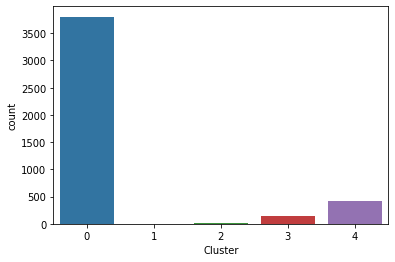

In [118]:
sns.countplot(x = "Cluster", data = main_df)

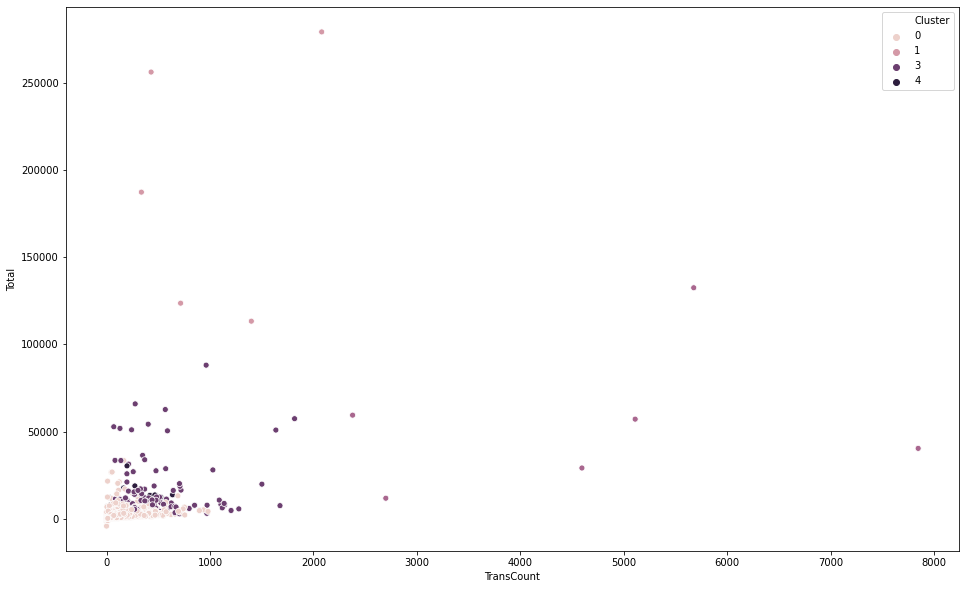

In [120]:
plt.figure(figsize=(16,10))
sns.scatterplot(x = "TransCount", y = "Total", hue = "Cluster", data= main_df)